## 加载鸢尾花数据集

数据集链接在[这里](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

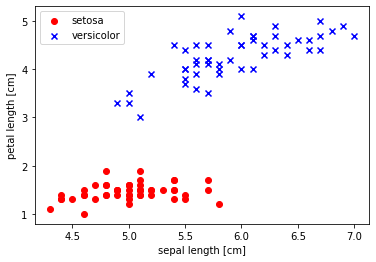

In [16]:
df = pd.read_csv('./data/iris.data', header=None)

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## 建立感知机

用给定的学习率$\eta$(`eta`)和训练次数`n_iter`初始化新的`Percptron`对象。

通过`fit`方法，初始化`self.w_`的权重，并把数据存入向量$R^{m+1}$，$m$代表数据集的维数或特征数，$+1$为偏差单位向量的第一个分量。注，该向量的第一个分量`self.w_[0]`代表前面讨论过的偏差单位。

该向量包含来源于正态分布的小随机数，通过调用`rgen.nromal(loc=0.0, scale=0.01, size=1+X.shape[1]`产生标准差为$0.01$的正态分布，其中`rgen`为NumPy随机数生成器，随机种子由用户指定，因此可以保证在需要时可以重现以前的结果。

In [17]:
from Perceptron import Perceptron

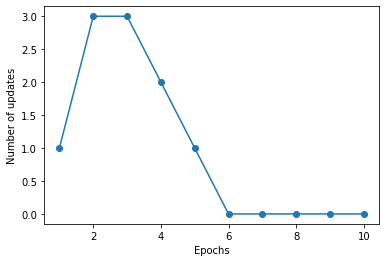

In [18]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## 二维数据决策边界的可视化

1. 定义颜色和标记并通过`ListedColormap`来从颜色列表创建色度图；
2. 通过NumPy的`meshgrid`函数创建网格阵列`xx1`和`xx2`，利用特征向量确定特征的最小和最大值；
3. 需要在两个特征维度上训练感知器分类器，所以需要对网格阵列进行扁平化。创建一个与训练子集相同列数对矩阵，从而调用`predict`方法来预测相应网格点的分类标签`z`

In [19]:
from matplotlib.colors import ListedColormap

In [22]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1], 
                    alpha = 0.8, 
                    c=colors[idx], 
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

4. 把预测获得的分类标签`z`改造成与`xx1`和`xx2`相同维数的网格后，可以通过调用MatPlotlib的`contourf`函数画出轮廓图
5. 把网格阵列中每个预测的分类结果标在不同颜色的决策区域

/var/folders/mk/8jvqpbv14d90ykw20cxt8k2m0000gn/T/ipykernel_48642/452787524.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


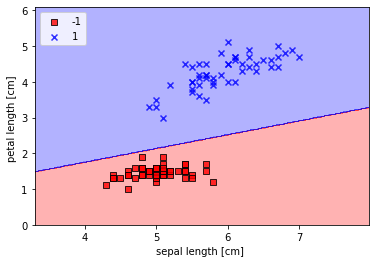

In [23]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm] ')
plt.ylabel('petal length [cm] ')
plt.legend(loc='upper left')
plt.show()